In [1]:
import numpy as np
#from scipy.integrate import solve_ivp
#from scipy.signal import spectrogram
import matplotlib.pyplot as plt
#from piaxi_numerics import set_params, solve_system, get_text_params

verbosity = 9
use_tex_format = False

In [2]:
# LaTeX Formatting for Plots
if use_tex_format:
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

    SMALL_SIZE = 8
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    '''plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the x tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', labelsize=BIGGER_SIZE, titlesize=BIGGER_SIZE)  # fontsize of the figure title'''

In [3]:
# TODO
sklearn_process = False
if sklearn_process:
    from sklearn.neural_network import MLPClassifier, MLPRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC

    ## TODO: Data generation, importing, and preprocessing

    # TODO: load dataset
    from sklearn.datasets import make_classification
    X, y = make_classification(random_state = 0, n_features = 20, n_informative = 18, n_classes = 3)

    # TODO: split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [4]:
# TODO
if sklearn_process:
    # Create dataset processing and classification pipeline
    model_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    model_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(max_iter=400))])
    models = [model_svc, model_mlp]

    # Fit model to training dataset
    for model in models:
        print(list(model.named_steps.keys())[1])
        model.fit(X_train, y_train)
        # Evaluate fit with test dataset
        print("Score: %.2f" % model.score(X_test, y_test))
        print(" --------------------------------------- ")

In [5]:
from piaxi_utils import fit_crude_epsilon_relation, fit_Fpi
fit_eps = False
eps = 1.
if fit_eps:
    pts = [(0.1,-19.9,eps), (0.5,-18.6,eps), (1,-17.9,eps)]
    fit_res, _ = fit_crude_epsilon_relation(pts_in=pts, plot_fit=True)
    if verbosity >= 0:
        print('y = %.3f log_10(10x + %.3f) + %.3f' % (fit_res[0], fit_res[1], fit_res[2]))

In [6]:
## Optionally solve for certain model-dependent parameters

# WIP: Crude fitting for F_pi given eps
# TODO: Reverse engineer proper pi-axiverse decay constant relation
fit_F = False
if fit_F:
    Fpi = fit_Fpi(1.0, 1e-20)

# Mass-coupling relations for pi-axion / QCD axion
# WIP/TODO: Stolen from Humberto's modification to AxionLimits notebook, check where these numbers/relations are coming from
g_a_from_m_a  = lambda m_a, epsilon=1, lambda1=1, theta=1, alpha=(1./137): (8.7e-12)*(alpha)*(epsilon**2)*(theta)*(lambda1)*(m_a**(1/4))
# Solve for pi-axion decay constant, given desired photon coupling
F_pi_from_g_a = lambda g_a, l1=1, eps=1: 2*l1*(eps**2) / g_a
# Solve for F_pi, given m_a, assuming above relations
F_pi_from_m_a = lambda m_a, l1=1, eps=1, theta=1, alpha=(1./137): F_pi_from_g_a(get_g_pi(m_a, l1=l1, eps=eps, theta=theta, alpha=alpha), l1=l1, eps=eps)

# Optionally fit parameters to be equivalent to QCD axion case
fit_QCD = True
if fit_QCD:
    # Solve for dark-quark mass, given desired axion mass
    m_I  = lambda m_a, F_pi=F_pi_from_m_a, c1=0.5, c2=0.5: m_a**2 / (F_pi(m_a)*(c1+c2))
    # Solve for model-dependent constants
    C_ag = lambda l1=1, eps=1, a_e=(1./137): -4*np.pi*(l1/a_e)*eps**2
    z_ag = lambda m_a, g_a: 2*(m_a)*(1./(g_a * 10e10))


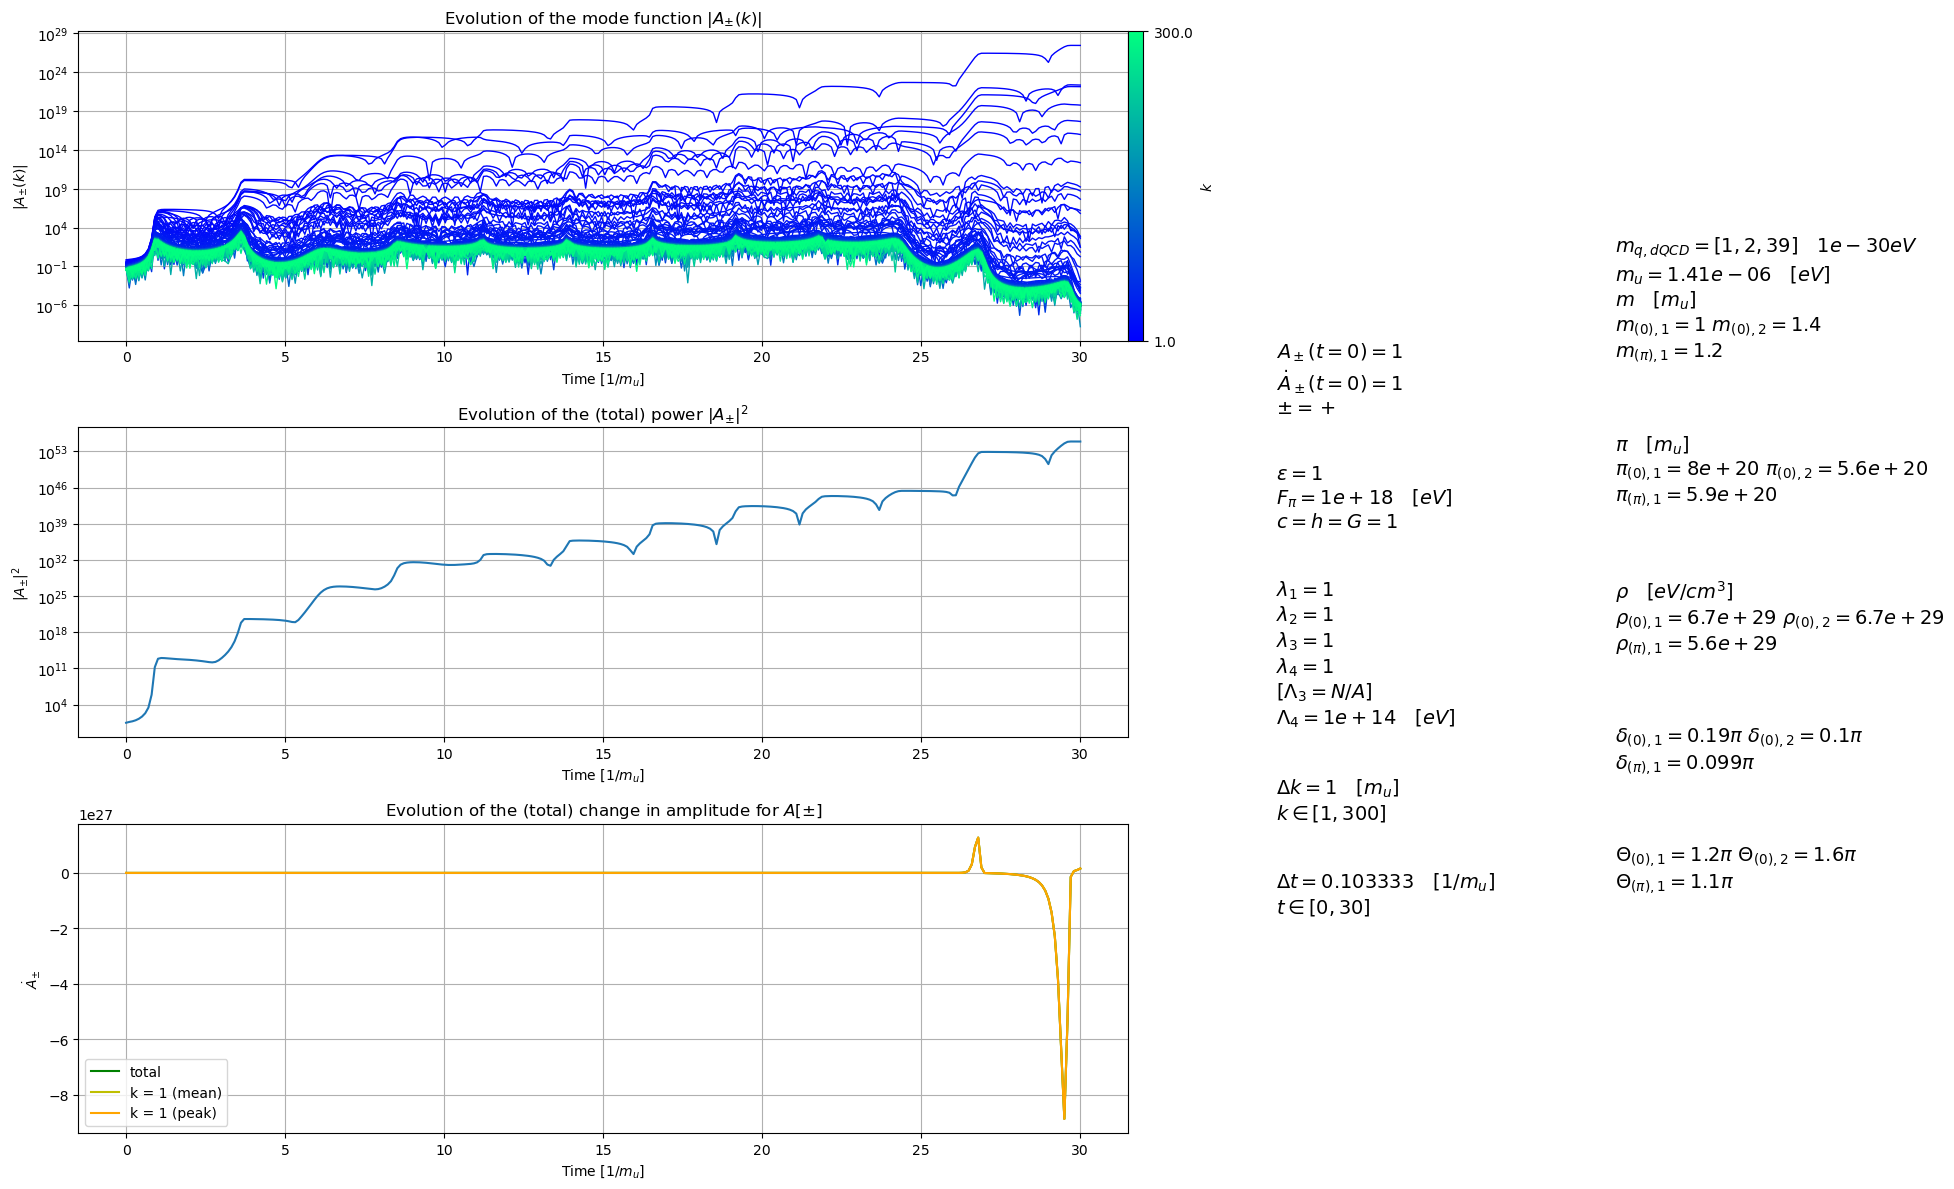

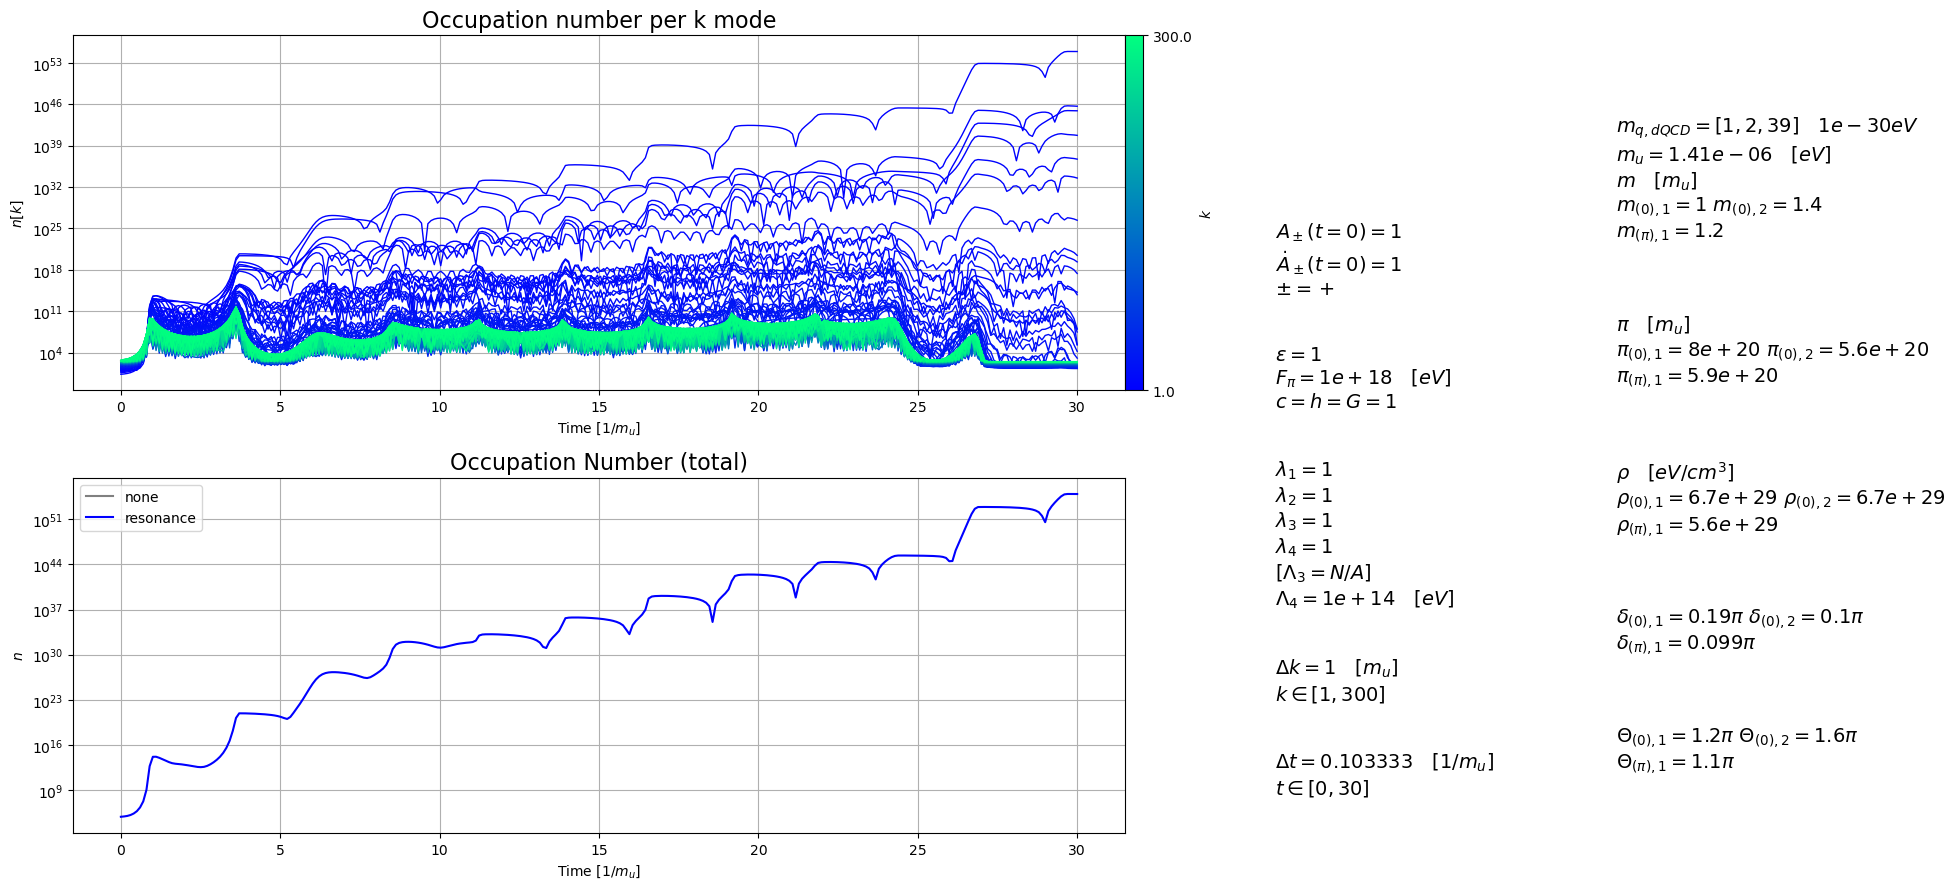

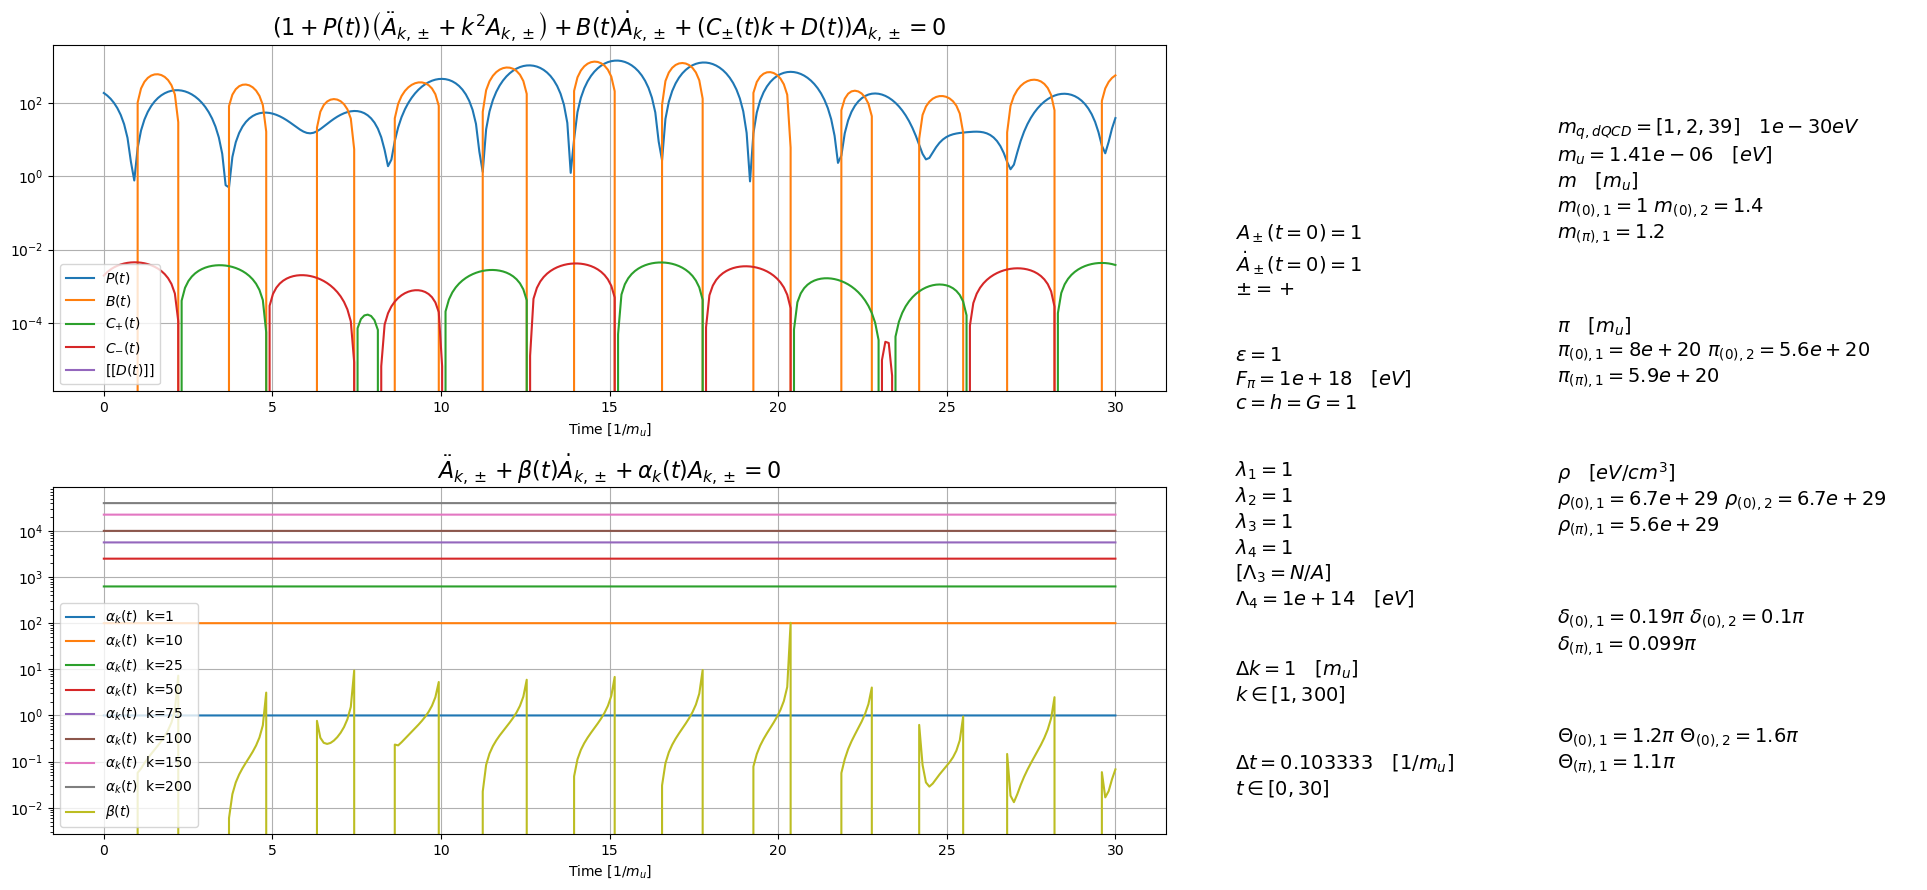

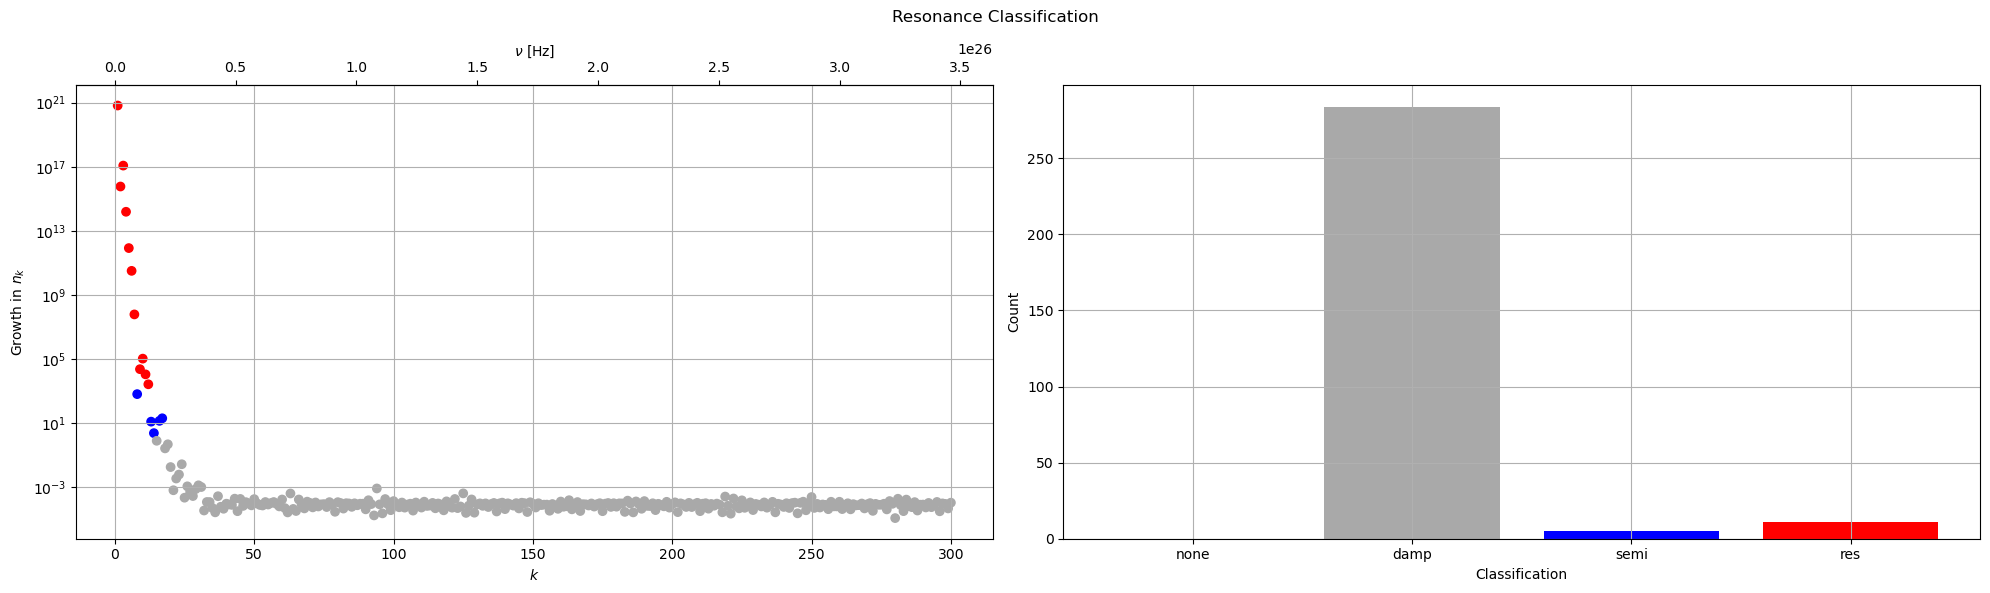

In [7]:
## Plot Single Case
from piaxi_utils import plot_single_case, load_single_result

#plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='./test_data/', version='v2.8', tex_fmt=use_tex_format)
plot_single_case('debug_bbbcfee89c436a9c11885e23159ef57a33e53985.json', output_dir='./scratch/', version='v3.2', tex_fmt=use_tex_format, add_colorbars=True, k_samples_in=[-1])

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from piaxi_utils import load_all, load_case, get_units_from_params

#np.warnings.filterwarnings("error", category=np.VisibleDeprecationWarning)

## Set dtypes and print formats for each column
param_map = {
    "config_name":       [str,             None],
    "units":             ['object',        None],
    "A_0":               [np.float32,      None],
    "A_pm":              [np.int32,        None],
    "A_sens":            [np.float32,      None],
    "Adot_0":            [np.float32,      None],
    "F":                 [np.float64,      'sci'],
    "G":                 [np.float64,      'sci'],
    "L3":                [np.float64,      'sci'],
    "L4":                [np.float64,      'sci'],
    "N_c":               [np.int32,        None],
    "N_n":               [np.int32,        None],
    "N_r":               [np.int32,        None],
    "N_tot":             [np.int32,        None],
    "Th":                [np.ndarray,      'pi'],
    "amps":              [np.ndarray,      'sci'],
    "c":                 [np.float32,      'sci'],
    "d":                 [np.ndarray,      'pi'],
    "dqm":               [np.ndarray,      'sci'],
    "e":                 [np.float32,      None],
    "eps":               [np.float64,      'sci'],
    "eps_c":             [np.ndarray,      'int'],
    "h":                 [np.float64,      'sci'],
    "int_method":        [str,             None],
    "jupyter":           ['Int64',         None],
    "k_0":               [np.float32,      'sci'],
    "k_class_arr":       [np.ndarray,      None],
    "k_mean_arr":        [np.ndarray,      None],
    "k_num":             [np.int32,        'int'],
    "k_peak_arr":        [np.ndarray,      None],
    "k_sens_arr":        [np.ndarray,      None],
    "k_span":            [np.ndarray,      'float'],
    "l1":                [np.int32,        None],
    "l2":                [np.int32,        None],
    "l3":                [np.int32,        None],
    "l4":                [np.int32,        None],
    "m":                 [np.ndarray,      'sci'],
    "m_0":               [np.float64,      'sci'],
    "m_c":               [np.ndarray,      'sci'],
    "m_n":               [np.ndarray,      'sci'],
    "m_q":               [np.float64,      'sci'],
    "m_r":               [np.ndarray,      'sci'],
    "m_u":               [np.float64,      'sci'],
    "mem_per_core":      ['Int64',        None],
    "mu_Th":             [np.float32,      'pi'],
    "mu_d":              [np.float32,      'pi'],
    "num_cores":         [np.int32,        None],
    "p":                 [np.ndarray,      'sci'],
    "p_0":               [np.float64,      'sci'],
    "p_c":               [np.ndarray,      'sci'],
    "p_n":               [np.ndarray,      'sci'],
    "p_r":               [np.ndarray,      'sci'],
    "p_t":               [np.float64,      'sci'],
    "parallel":          [bool,            None],
    "qc":                [np.ndarray,      'float'],
    "qm":                [np.ndarray,      'sci'],
    "res_band":          [np.ndarray,      'sci'],
    "res_band_class":    [str,             None],
    "res_class":         [str,             None],
    "res_con":           [np.float32,      None],
    "res_freq":          [str,             None],
    "res_freq_class":    ['object',        None],
    "rescale_amps":      [bool,            None],
    "rescale_consts":    [bool,            None],
    "rescale_k":         [bool,            None],
    "rescale_m":         [bool,            None],
    "seed":              [str,             None],
    "sig_Th":            [np.float32,      'pi'],
    "sig_d":             [np.float32,      'pi'],
    "t_num":             [np.int32,        None],
    "t_res":             [np.float32,      'float'],
    "t_sens":            [np.float32,      'sci'],
    "t_span":            [np.ndarray,      'float'],
    "t_u":               [np.float64,      'sci'],
    "use_natural_units": [bool,            None],
    "use_mass_units":    [bool,            None],
    "dimensionful_p":    [bool,            None],
    "time_elapsed":      [str,             None],
    "unitful_amps":      [bool,            None],
    "unitful_k":         [bool,            None],
    "unitful_m":         [bool,            None],
    "xi":                [np.ndarray,      'float'],
}

dtype_map = {key: val[0] for key,val in param_map.items()}
print_fmt = {key: val[1] for key,val in param_map.items()}

#df[["A"]].describe().applymap(lambda x: f"{x:0.3f}")
def df_fmt(x, fmt=None):
    if pd.isna(x):
        return ''
    if type(x) in [float, np.float32, np.float64] or fmt in ['sci', 'pi', 'float']:
        if fmt == 'sci':
            return f'{x:.1e}'
        elif fmt == 'pi':
            xp = x/np.pi
            return f'{xp:0.1f}'
        else:
            return f'{x:0.1f}'
    elif type(x) in [int, np.int32, np.int64, 'Int64'] or fmt in ['int']:
        if x == 'None':
            return None
        else:
            return f'{x:d}'
    elif type(x) is str:
        if x.lower() == 'nan':
            return ''
        else:
            return x
    else:
        #print(x, type(x))
        return x

# WIP: Pretty printing dataframes
def df_pprint(df_in):
    df = df_in.copy()
    for param in df:
        df[param].apply(df_fmt, args=(print_fmt[param],))
    return df

def df_describe(df_in, use_pprint=False, include='all'):
    if use_pprint:
        return df_pprint(df_in.describe(include=include))
    else:
        return df_in.describe(include=include)

In [9]:
def prepare_data(config_name, output_root='~/scratch', version='v3.2.5'):
    """Load and prepare data for future functions"""

    if config_name == 'all':
        params, results, _, coeffs = load_all(output_root, version)
    else:
        params, results, _, coeffs = load_case(config_name, output_root, version)
    
    # Convert to DataFrames for ease of manipulation
    params_df  = pd.DataFrame(params)

    # Extract units mappings
    units_in = params_df.pop('units')
    units_df = pd.DataFrame(units_in.tolist(), index=params_df.index)
    
    # TODO: Temp fix, remove this when no longer needed
    if int(version.replace('v','').split('.')[0]) <= 2:
        params_df['jupyter'].fillna(False, inplace=True)
    # TODO: Temp fix, remove this when no longer needed
    if int(version.replace('v','').split('.')[0]) <= 3:
        if 'N_tot' not in params_df.keys():
            params_df['N_tot'] = params_df['N_r'].astype(np.int32)+params_df['N_n'].astype(np.int32)+params_df['N_c'].astype(np.int32)

    # Preprocess stored parameter values and populate dataframe
    for col, dtype in dtype_map.items():
        #print('col: %s   |  dtype: %s' % (col,dtype))
        if col in params_df:
            try:
                if dtype is np.ndarray:
                    try:
                        params_df[col] = params_df[col].apply(np.array, dtype=object)
                    except (np.VisibleDeprecationWarning):
                        print('Deprecation: %s' % col)
                        print(params_df[col])
                        params_df[col] = params_df[col].apply(np.array)
                else:
                    params_df[col] = params_df[col].astype(dtype)
            except (OverflowError):
                print('Overflow: (%s) - %s' % (col, dtype))

    # Dataframe containing results of numerics and data for plotting
    res_arr = np.array(results[0], dtype=np.float64)[:,0,:]
    results_df = pd.DataFrame(res_arr)

    # Dataframe containing the functions corresponding to oscillating coefficients B(t), C+/-(t), D(t), and P(t)
    coeffs_df  = pd.DataFrame(coeffs)
    
    return params_df, results_df, coeffs_df, units_df


def plot_heatmaps(df):
    """Plot heatmaps of k_class_arr, k_sens_arr, and k_peak_arr over multiple runs."""
    
    # Assuming the arrays are already in the correct format
    k_class_arr = df['k_class_arr']
    k_sens_arr  = df['k_sens_arr']
    k_peak_arr  = df['k_peak_arr']
    k_spans     = df['k_span']

    # Determine the global k-range
    global_k_min = min([span[0] for span in k_spans])
    global_k_max = max([span[1] for span in k_spans])
    total_k_modes = max([len(arr) for arr in k_class_arr])  # maximum number of k-modes
    
    # Convert string values to unique integers for plotting
    #unique_values = np.unique(np.concatenate(k_class_arr))
    unique_values = ['damp','none','semi','res']
    num_runs   = len(k_class_arr)
    num_values = len(k_class_arr[0])
    value_to_int = {value: idx for idx, value in enumerate(unique_values)}
    
    #k_class_arr = [[value_to_int[val] for val in row] for row in k_class_arr]
    #k_sens_arr  = [[val for val in row] for row in k_sens_arr]
    #k_peak_arr  = [[val for val in row] for row in k_peak_arr]
    
    if True:
        # Initialize combined heatmaps
        combined_k_class = np.full((len(k_class_arr), total_k_modes), np.nan)
        combined_k_sens  = np.full((len(k_sens_arr), total_k_modes), np.nan)
        combined_k_peak  = np.full((len(k_peak_arr), total_k_modes), np.nan)
        
        k_sens_min = k_sens_max = k_peak_min = k_peak_max = None

        # Fill in the combined heatmaps
        for idx, (k_class, k_sens, k_peak, k_span) in enumerate(zip(k_class_arr, k_sens_arr, k_peak_arr, k_spans)):
            start_idx = int((k_span[0] - global_k_min) * total_k_modes / (global_k_max - global_k_min))
            end_idx = start_idx + len(k_class)
            #print(k_class)
            combined_k_class[idx, start_idx:end_idx] = [value_to_int[val] for val in k_class]
            combined_k_sens[idx, start_idx:end_idx] = k_sens
            combined_k_peak[idx, start_idx:end_idx] = k_peak
            
            k_sens_min = min(k_sens) if k_sens_min is None else min(k_sens_min, min(k_sens))
            k_sens_max = max(k_sens) if k_sens_max is None else max(k_sens_max, max(k_sens))
            k_peak_min = min(k_peak) if k_peak_min is None else min(k_peak_min, min(k_peak))
            k_peak_max = max(k_peak) if k_peak_max is None else max(k_peak_max, max(k_peak))

        # Plot the combined heatmaps
        plt.figure(figsize=(10, 12))
        ax1 = plt.subplot(3, 1, 1)
        im1 = plt.imshow(combined_k_class, aspect='auto', cmap='viridis')
        plt.title('k_class_arr')

        ax2 = plt.subplot(3, 1, 2)
        im2 = plt.imshow(combined_k_sens, aspect='auto', cmap='autumn')
        plt.title('k_sens_arr')

        ax3 = plt.subplot(3, 1, 3)
        im3 = plt.imshow(combined_k_peak, aspect='auto', cmap='autumn')
        plt.title('k_peak_arr')
        
        # Add colorbars to indicate the mapping from integers back to string values
        cbar1 = plt.colorbar(im1, ax=ax1, ticks=list(value_to_int.values()))
        cbar1.set_ticklabels(list(value_to_int.keys()))

        cbar2 = plt.colorbar(im2, ax=ax2, ticks=np.linspace(k_sens_min, k_sens_max, 3))
        #cbar2.set_ticklabels(list(value_to_int.keys()))

        cbar3 = plt.colorbar(im3, ax=ax3, ticks=np.linspace(k_peak_min, k_peak_max, 3))
        #cbar3.set_ticklabels(list(value_to_int.keys()))
        

        plt.tight_layout()
        plt.show()
        
    else:
        fig, axs = plt.subplots(3, 1, figsize=(10, 15))

        im1 = axs[0].imshow(k_class_arr, aspect='auto', cmap='viridis')
        axs[0].set_title('k_class_arr heatmap')
        axs[0].set_xlabel('Index')
        axs[0].set_ylabel('Run')

        im2 = axs[1].imshow(k_sens_arr, aspect='auto', cmap='autumn')
        axs[1].set_title('k_sens_arr heatmap')
        axs[1].set_xlabel('Index')
        axs[1].set_ylabel('Run')

        im3 = axs[2].imshow(k_peak_arr, aspect='auto', cmap='autumn')
        axs[2].set_title('k_peak_arr heatmap')
        axs[2].set_xlabel('Index')
        axs[2].set_ylabel('Run')

        # Add colorbars to indicate the mapping from integers back to string values
        cbar1 = plt.colorbar(im1, ax=axs[0], ticks=list(value_to_int.values()))
        cbar1.set_ticklabels(list(value_to_int.keys()))

        cbar2 = plt.colorbar(im2, ax=axs[1], ticks=list(value_to_int.values()))
        cbar2.set_ticklabels(list(value_to_int.keys()))

        cbar3 = plt.colorbar(im3, ax=axs[2], ticks=list(value_to_int.values()))
        cbar3.set_ticklabels(list(value_to_int.keys()))

        plt.tight_layout()
        plt.show()

def plot_scatter(df):
    """Plot m_r vs F and p_t vs Lambda4 scatter plots over multiple runs, labeled by res_class."""
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    
    unique_classes = df['res_class'].unique()
    
    for res_cls in unique_classes:
        subset = df[df['res_class'] == res_cls]
        
        axs[0].scatter(subset['F'], subset['m_r'].str[0], label=f'Res Class {res_cls}')
        axs[1].scatter(subset['L4'], subset['p_t'], label=f'Res Class {res_cls}')
    
    axs[0].set_title('m_r vs F')
    axs[0].set_xlabel('F')
    axs[0].set_ylabel('m_r')
    
    axs[1].set_title('p_t vs Lambda4')
    axs[1].set_xlabel('Lambda4 (L4)')
    axs[1].set_ylabel('p_t')
    
    axs[0].legend()
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

In [10]:
## Prepare data for a category of runs
load_case = 'all'  # name of config identifier to import data for. Use 'all' for all (non-debug) datasets of a given version number.
params_data, results_data, coeffs_data, units_df = prepare_data(config_name=load_case)
print(params_data.columns)

Index(['A_0', 'A_pm', 'A_sens', 'Adot_0', 'F', 'G', 'L3', 'L4', 'N_c', 'N_n',
       'N_r', 'Th', 'amps', 'c', 'd', 'dimensionful_p', 'dqm', 'e', 'eps',
       'eps_c', 'h', 'int_method', 'jupyter', 'k_0', 'k_class_arr',
       'k_mean_arr', 'k_num', 'k_peak_arr', 'k_sens_arr', 'k_span', 'l1', 'l2',
       'l3', 'l4', 'm', 'm_0', 'm_c', 'm_n', 'm_q', 'm_r', 'm_u',
       'mem_per_core', 'mu_Th', 'mu_d', 'num_cores', 'p', 'p_0', 'p_c', 'p_n',
       'p_r', 'p_t', 'parallel', 'qc', 'qm', 'res_band', 'res_band_class',
       'res_class', 'res_con', 'res_freq', 'res_freq_class', 'rescale_amps',
       'rescale_consts', 'rescale_k', 'rescale_m', 'seed', 'sig_Th', 'sig_d',
       't_num', 't_res', 't_sens', 't_span', 't_u', 'time_elapsed',
       'unitful_amps', 'unitful_k', 'unitful_m', 'use_mass_units',
       'use_natural_units', 'xi', 'config_name', 'N_tot'],
      dtype='object')


In [11]:
## Preprocess Units
# TODO: Group runs by unit choices if more than one permutation exists? Maybe p-hashing the dict?
unique_units = {col: len(units_df[col].unique()) <= 1 for col in units_df.columns}
all_unique   = np.all([unique_units[key] for key in unique_units.keys()])
# Assume all runs included use the same units for now
if all_unique:
    unique_units = {col: units_df[col].unique()[0] for col in units_df.columns}
else:
    unique_units = {col: units_df[col].unique()[0] for col in units_df.columns if unique_units[col]}
    print('Non-unique units: ', [col for col in unique_units.keys() if not unique_units[col]])

# WIP: Organize mapping of units for each variable
# TODO: Double check this and make sure units are being handled properly throughout
#       the simulation
# TODO: Double check the below overrides (taken from print_param_space() in piaxi_utils)
#       make sense and are okay to do, I forget why the code does this exactly...
units_map = {}
for u_key in ['m','m_c','m_n','m_r']:
    units_map[u_key] = unique_units['m']
for u_key in ['F']:
    units_map[u_key] = unique_units['F']
    if unique_units['F'] == 'm_u':
        units_map[u_key] = 'eV' # TODO: Check this! (F_pi value is always saved in eV)
    else:
        units_map[u_key] = unique_units['F']
for u_key in ['L3', 'L4']:
    if unique_units['Lambda'] == 'm_u':
        units_map[u_key] = 'eV' # TODO: Check this! (Lambda values are always saved in eV)
    else:
        units_map[u_key] = unique_units['Lambda']
for u_key in ['l1', 'l2', 'l3', 'l4']:
    units_map[u_key] = unique_units['lambda']
for u_key in ['amps']:
    units_map[u_key] = unique_units['amp']
for u_key in ['t_span','t_sens','t_res']:
    units_map[u_key] = unique_units['t']
for u_key in ['k_span']:
    if unique_units['k'] == 'eV':
        units_map[u_key] = 'm_u' # TODO: Check this! (k values are always saved in m_u)
    else:
        units_map[u_key] = unique_units['k']
for u_key in ['p','p_t','p_c','p_n','p_r']:
    units_map[u_key] = unique_units['p']
for u_key in ['Th','mu_Th','sig_Th']:
    units_map[u_key] = unique_units['Theta']
for u_key in ['d','mu_d','sig_d']:
    units_map[u_key] = unique_units['delta']
for u_key in ['c','h','G']:
    units_map[u_key] = unique_units[u_key]
for u_key in ['m_q']:
    units_map[u_key] = 'eV'
#param_units = {key: unique_units[units_map[key]] for key in units_map.keys()}
param_units = units_map

units_fmt = lambda key, prefix='', units=param_units: '' if key not in units.keys() else ('[%s%s]' % (prefix, units[key])) if units[key] != 1 else ''

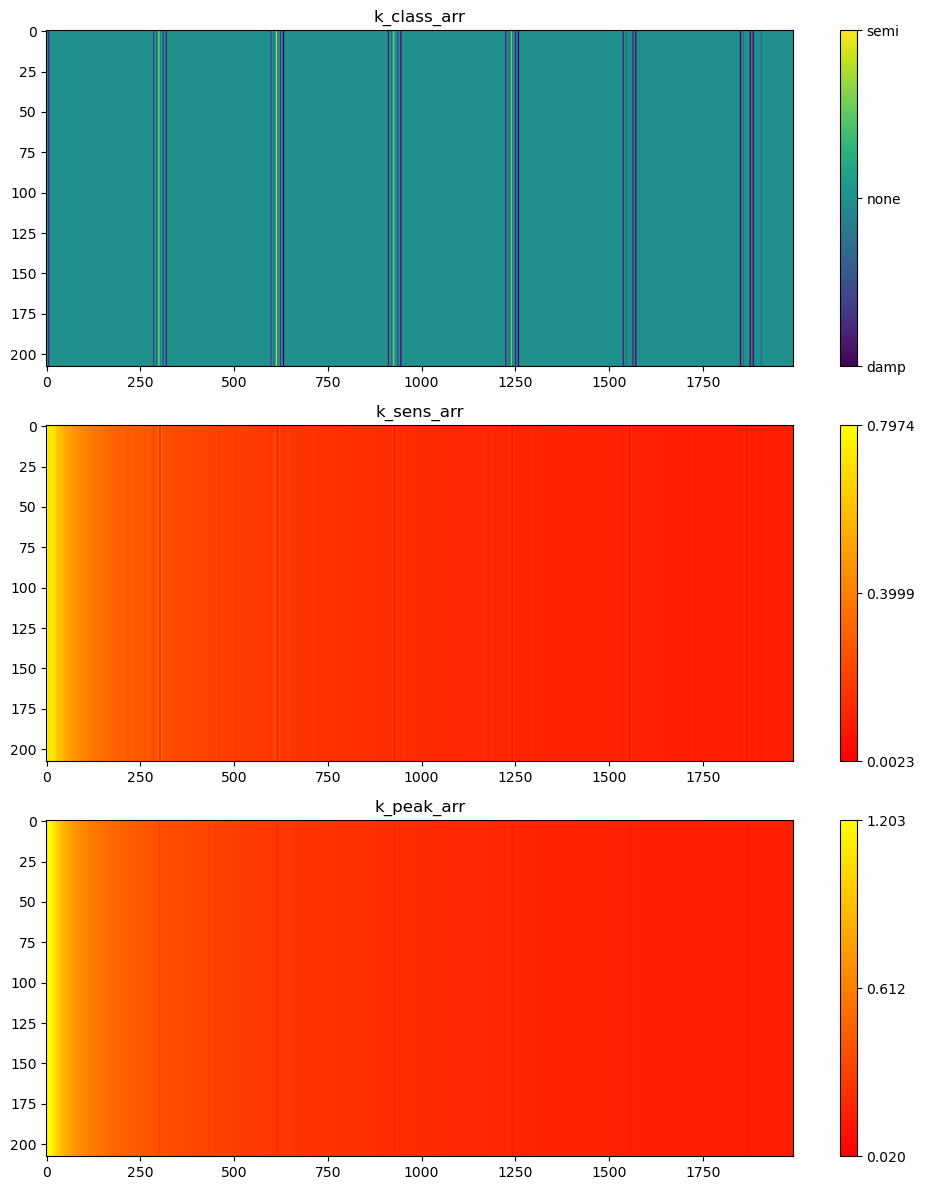

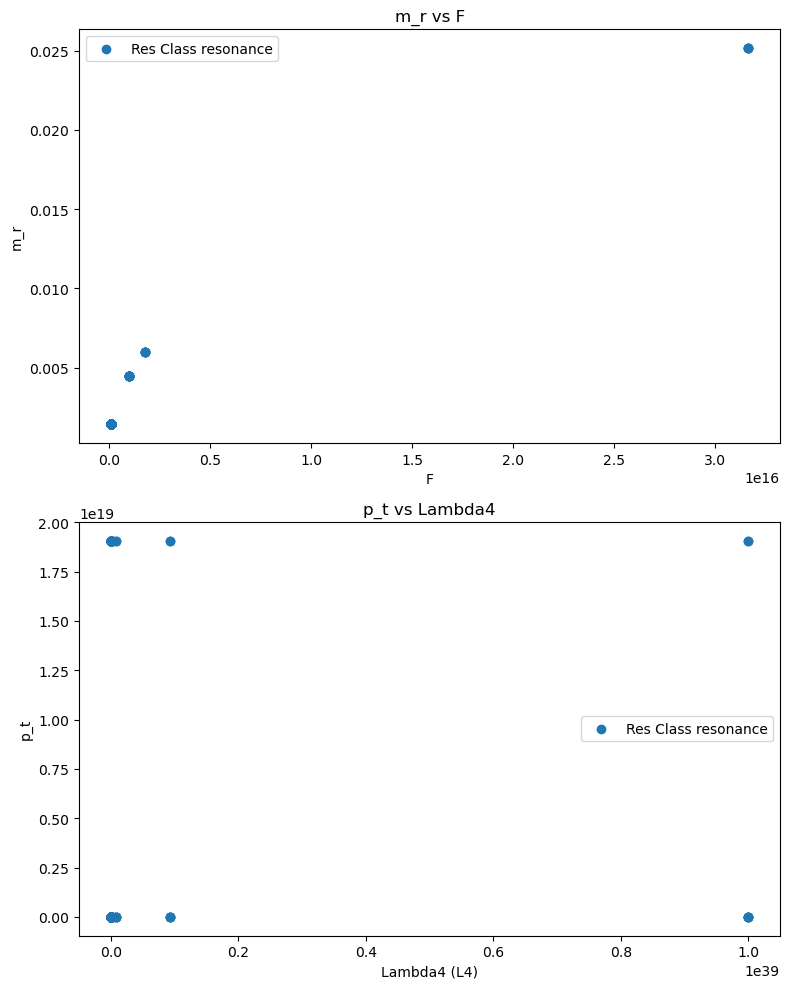

In [12]:
## WIP: Visualize imported data for a category of runs
plot_heatmaps(params_data)
plot_scatter(params_data)

In [13]:
## Analyze a run's plots TODO/WIP
if False:

    # Sample data (replace with actual data)
    #params, results, _, coeffs = load_single_result(filename='3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3', output_dir='./test_data/v2.8/3_neutrals/')
    

    # Placeholder for raw solution (replace with actual data when available)
    data = params_data
    raw_solution = results_data
    print(results_data)

    # Heatmap for raw solution
    plt.figure(figsize=(12, 8))
    sns.heatmap(raw_solution, cmap='viridis')
    plt.title("Heatmap of Raw Solution (Amplitude of Photon Field)")
    plt.xlabel("k-mode")
    plt.ylabel("Time")
    plt.show()

    # Bar plots for k_mean_arr, k_peak_arr, and k_sens_arr
    k_modes = np.arange(1, len(data["k_mean_arr"]) + 1)
    plt.figure(figsize=(12, 8))
    plt.bar(k_modes, data["k_mean_arr"], label="k_mean_arr", alpha=0.6)
    plt.bar(k_modes, data["k_peak_arr"], label="k_peak_arr", alpha=0.6)
    plt.bar(k_modes, data["k_sens_arr"], label="k_sens_arr", alpha=0.6)
    plt.xlabel("k-mode")
    plt.ylabel("Value")
    plt.title("Bar Plots for k_mean_arr, k_peak_arr, and k_sens_arr")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Categorical plot for k_class_arr
    plt.figure(figsize=(12, 8))
    sns.countplot(data["k_class_arr"])
    plt.title("Distribution of Classification Labels")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_k_vs_parameter_heatmap(df, parameter, mode='absolute'):
    # Extract global k range
    global_k_min = df['k_span'].apply(lambda x: x[0]).min()
    global_k_max = df['k_span'].apply(lambda x: x[1]).max()
    k_values = np.linspace(global_k_min, global_k_max, 500)  # Sampled k-values

    param_values = df[parameter].unique()
    heatmap_grid = np.zeros((len(param_values), len(k_values)))

    for i, param_val in enumerate(param_values):
        subset = df[df[parameter] == param_val]
        for j, k_val in enumerate(k_values):
            count = 0
            for _, row in subset.iterrows():
                k_min, k_max = row['k_span']
                if k_val >= k_min and k_val <= k_max:
                    index = np.argmin(np.abs(row['k_sens_arr'] - k_val))
                    if row['k_class_arr'][index] == 'res':
                        count += 1
            if mode == 'fraction':
                count /= len(subset)
            heatmap_grid[i, j] = count

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_grid, xticklabels=50, yticklabels=param_values, cmap="YlGnBu")
    plt.xlabel('k-values')
    plt.ylabel(parameter)
    title = f"Heatmap of 'res' count in k_class_arr vs. {parameter}"
    if mode == 'fraction':
        title += " (fraction)"
    plt.title(title)
    plt.show()


In [15]:
## TODO: k-mode instability (floquet) plots

if False:
    plot_k_vs_parameter_heatmap(params_data, 'm_u')
    plot_k_vs_parameter_heatmap(params_data, 'F')
    plot_k_vs_parameter_heatmap(params_data, 'L4')
    plot_k_vs_parameter_heatmap(params_data, 'p_t')

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_columns = None

# Convert dictionary to DataFrame for ease of manipulation
df_in = params_data.copy(deep=True)

## Handle list/dict structured parameters
df_arr_cols = ['qc', 'qm', 'xi', 'dqm', 'eps_c'] + \
              ['m_r', 'm_n', 'm_c', 'p_r', 'p_n', 'p_c'] + \
              ['res_band', 't_span', 'k_span']
              #['k_class', 'k_peak', 'k_mean', 'k_sens'] + \
df_subarrs = ['amps', 'd', 'Th'] # + [m, p]
df_dict_cols = ['res_freq_class']
df_arr_keys = {}
df_dict_keys = {}
def df_push_dict(dict_in, col_in, sub_cols_in):
    for x in sub_cols_in:
        dict_in[x] = dict_in[col_in]
    return dict_in
# Expand array-like features into discrete columns
df = df_in.copy(deep=True)
for col in df_arr_cols:
    columns = ['%s_%d' % (col, ex_idx) for ex_idx, _ in enumerate(df[col][0])]
    df_arr_keys[col] = columns
    for col_x in columns:
        print_fmt[col_x] = print_fmt[col]
        dtype_map[col_x] = dtype_map[col]
    df = pd.concat([df, df.pop('%s' % col).apply(pd.Series).add_prefix('%s_' % col)], axis=1)
for col in df_subarrs:
    columns = ['%s_%d' % (col, ex_idx) for ex_idx, _ in enumerate(df[col][0])]
    df_arr_keys[col] = columns
    for col_x in columns:
        print_fmt[col_x] = print_fmt[col]
        dtype_map[col_x] = dtype_map[col]
    df = pd.concat([df, df.pop('%s' % col).apply(pd.Series).add_prefix('%s_' % col)], axis=1)
    for sub_idx, sub_col in enumerate(df[columns]):
        sub_columns = ['%s_%d' % (sub_col, ex_idx) for ex_idx, _ in enumerate(df[sub_col][0])]
        df_arr_keys[sub_col] = sub_columns
        for col_x in sub_columns:
            print_fmt[col_x] = print_fmt[sub_col]
            dtype_map[col_x] = dtype_map[sub_col]
        df = pd.concat([df, df.pop('%s' % sub_col).apply(pd.Series).add_prefix('%s_' % sub_col)], axis=1)
# Do the same for dicts
for col in df_dict_cols:
    col_data = {'%s_%s' % (col, key): val for key,val in df[col][0].items()}
    columns = col_data.keys()
    for col_x in columns:
        print_fmt[col_x] = print_fmt[col]
        dtype_map[col_x] = dtype_map[col]
    df = pd.concat([df, df.pop('%s' % col).apply(pd.Series, index=columns)], axis=1)
    df_dict_keys[col] = columns

# Helper functions
is_arr_param = lambda p_col: p_col in df_arr_cols or p_col in df_subarrs
is_dict_param = lambda p_col: p_col in df_dict_cols
is_vectorized_param = lambda p_col: is_arr_param(p_col) or is_dict_param(p_col)
get_vectorized_cols = lambda p_col: df_arr_keys[p_col] if is_arr_param(p_col) else df_dict_keys[p_col] if is_dict_param(p_col) else print(p_col)
vec_col_set = lambda set_in: ((set(df_arr_cols + df_dict_cols) | (set(df_arr_keys.keys()) - set(df_subarrs))) & set(set_in))
vectorized_param_set = lambda set_in: \
    ((set(set_in) | set([vec_val for vec_col in [get_vectorized_cols(vec_col_in) for vec_col_in in vec_col_set(set_in)] for vec_val in vec_col])) - (vec_col_set(set_in) | set(df_subarrs)))

# Descriptive Statistics
if False:
    print(df.describe())
print('-----------------------------------------------------------------')

## Organize parameters
# Parameters related to computational complexity and runtime performance
performance_inputs = ['num_cores', 'jupyter', 'parallel', 'use_mass_units', 'use_natural_units', 'k_num', 't_num', 'N_r', 'N_c', 'N_n', 'N_tot', 'mem_per_core', 'k_span', 't_span']
performance_outputs = ['time_elapsed']
primary_sim_settings = ['k_span', 't_span', 'int_method', 'res_con', 'k_num', 't_num']
secondary_sim_settings = ['A_sens', 't_sens']
tertiary_sim_settings = ['use_mass_units', 'use_natural_units', 'dimensionful_p', 'rescale_consts', 'unitful_amps', 'unitful_k', 'unitful_m', 'rescale_k', 'rescale_m', 'rescale_amps', 'rescale_consts']
sim_settings_parameters = primary_sim_settings + secondary_sim_settings + tertiary_sim_settings
# Input parameters
primary_inputs = ['F', 'm_q', 'eps', 'p_t', 'L4', 'L3']
secondary_inputs = ['A_0', 'Adot_0', 'A_pm', 'mu_Th', 'mu_d', 'sig_Th', 'sig_d']
tertiary_inputs = ['qc', 'xi', 'eps_c', 'qm', 'l1', 'l2', 'l3', 'l4', 'e', 'G', 'c', 'h']
input_parameters = primary_inputs + secondary_inputs + tertiary_inputs
# Dependent Parameters
primary_dependents = ['N_r', 'N_c', 'N_n', 'N_tot']
secondary_dependents = ['m_u', 't_u', 'm_0', 'k_0', 'p_0']
tertiary_dependents = ['dqm', 'm', 'm_r', 'm_n', 'm_c', 'p', 'p_r', 'p_n', 'p_c', 'amps']
dependent_parameters = primary_inputs + secondary_inputs + tertiary_inputs
k_dependents = ['k_class_arr', 'k_mean_arr', 'k_peak_arr', 'k_sens_arr']
# TODO: Maybe do correlation / metastatistics for sampled / dependent parameters as included parameters?
sampled_params = ['d', 'Th']
# Unused parameters
disabled_params = ['seed']
cosmetic_params = ['config_name']
# Output/classification parameters
primary_outputs = ['res_class', 'res_band_class']
secondary_outputs = ['res_band', 'res_freq', 'res_freq_class', 't_res']

# Create unique sets and split vector-shaped parameters into separate columns
performance_params = performance_inputs + performance_outputs + primary_inputs + \
                     primary_sim_settings + secondary_sim_settings + cosmetic_params
time_param_set = vectorized_param_set(performance_params)

correlation_params = primary_inputs + secondary_inputs + \
                     primary_sim_settings + sampled_params + \
                     primary_dependents + secondary_dependents + \
                     primary_outputs + secondary_outputs + cosmetic_params
corr_param_set = vectorized_param_set(correlation_params)

hidden_params = disabled_params + k_dependents + \
                tertiary_inputs + tertiary_sim_settings + tertiary_dependents

combined_params = correlation_params + performance_params + hidden_params
#print(combined_params)
combined_param_set = vectorized_param_set(combined_params)
#print(combined_param_set)

if False: # Temp. prune parameters not found in older datasets
    new_params = ['res_freq', 'use_natural_units', 'res_band', 'use_mass_units', 'res_band_class']
    for new_param in new_params:
        if new_param not in df.columns:
            if new_param in corr_param_set:
                corr_param_set.remove(new_param)
            if new_param in time_param_set:
                time_param_set.remove(new_param)
            if new_param in combined_param_set:
                combined_param_set.remove(new_param)

full_df = df[sorted(combined_param_set)]
#print(full_df)
corr_df = df[sorted(corr_param_set)]
time_df = df[sorted(time_param_set)]

# Identify any free parameters not being properly classified
unclassified_params = set(df_in.columns) - set(combined_params)
if len(unclassified_params) > 0:
    print('-----------------------------------------------------------------')
    print('Unclassified parameters: ')
    for col in unclassified_params:
        print('%s  : %s' % (col, df_in[col].dtype))

# Correlation Analysis
print('\nModel Parameters and Correlations')
print(df_describe(corr_df))
#print(df_pprint(corr_df))
correlation_matrix = corr_df.corr(numeric_only=True)
#print(df_pprint(correlation_matrix))
print('-----------------------------------------------------------------')

# Complexity Analysis
print('Time Complexity Parameters and Correlations')
print(df_describe(time_df))
time_corr_matrix = time_df.corr(numeric_only=True)
#print(df_pprint(time_corr_matrix))
print('-----------------------------------------------------------------')

-----------------------------------------------------------------

Model Parameters and Correlations
          A_0   A_pm  Adot_0             F            L3            L4  \
count   208.0  208.0   208.0  2.080000e+02  2.080000e+02  2.080000e+02   
unique    NaN    NaN     NaN           NaN           NaN           NaN   
top       NaN    NaN     NaN           NaN           NaN           NaN   
freq      NaN    NaN     NaN           NaN           NaN           NaN   
mean      1.0    1.0     1.0  8.071274e+14  9.951923e+19  3.658943e+37   
std       0.0    0.0     0.0  4.338436e+15  6.933752e+18  1.808883e+38   
min       1.0    1.0     1.0  1.000000e+14  1.000000e+09  1.000000e+09   
25%       1.0    1.0     1.0  1.000000e+14  1.000000e+20  1.487352e+14   
50%       1.0    1.0     1.0  1.000000e+14  1.000000e+20  2.807216e+22   
75%       1.0    1.0     1.0  1.000000e+14  1.000000e+20  1.187943e+31   
max       1.0    1.0     1.0  3.162278e+16  1.000000e+20  1.000000e+39   

          

Including data from the following configurations:
    |  pi_axiverse_clump
    |  pi_axiverse_clump_simple
    |  pi_axiverse_local
    |  pi_axiverse_star
    |  pi_axiverse_star_full

Simulation settings:
          int_method :        RK45  []
               k_num :        1991  []
             res_con :      1000.0  []
               t_num :         300  []
Fixed params:
                 A_0 :         1.0  
                A_pm :           1  
              Adot_0 :         1.0  
                 eps :     1.0e-25  
                 m_q :    -2.0e+01  [log eV]
               mu_Th :         1.0  [π]
                mu_d :         1.0  [π]
              sig_Th :         0.3  [π]
               sig_d :         0.3  [π]



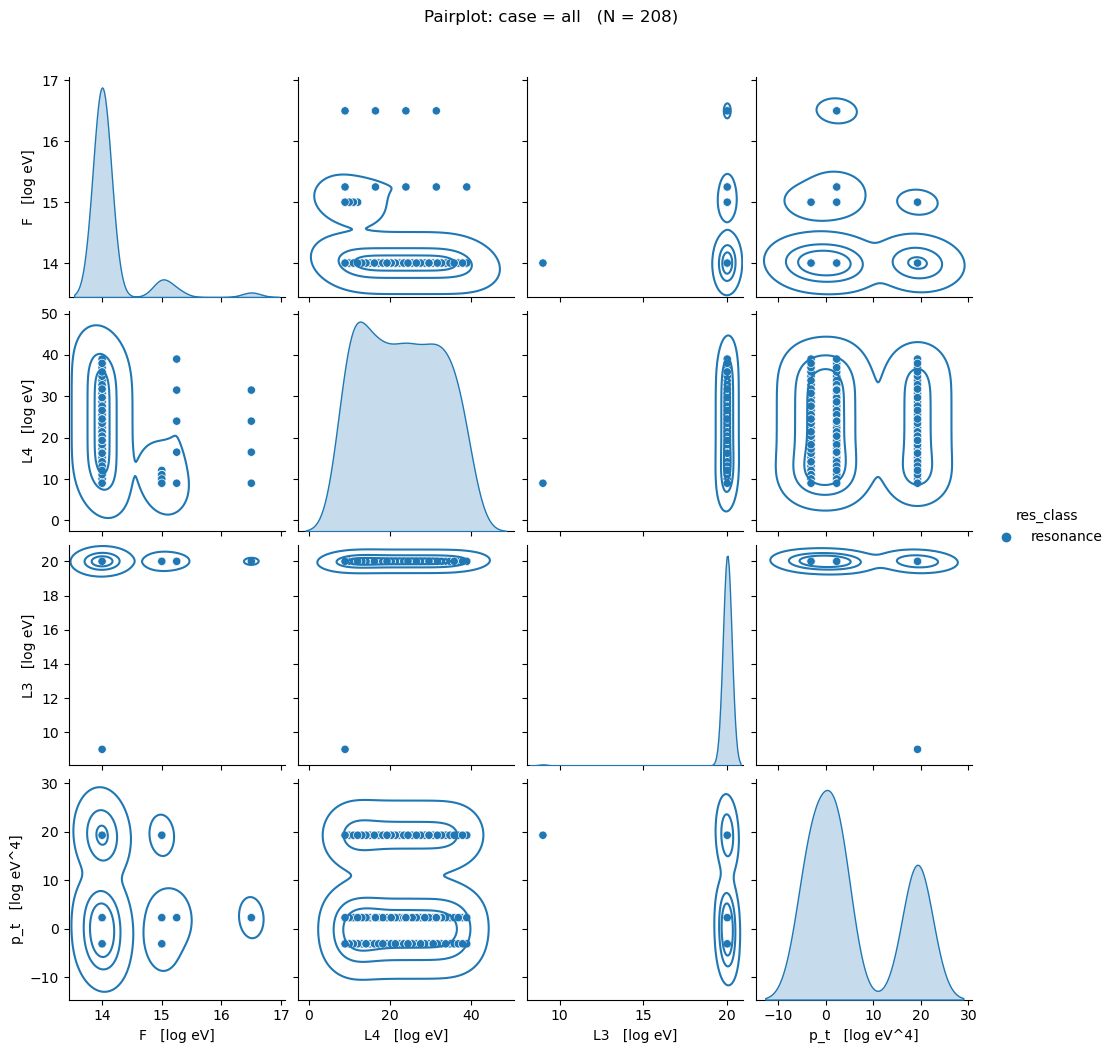

In [23]:
## Visualization
show_histograms = False
show_pairplot   = True
show_heatmap    = False

log_params  = ['p_0','p_t','F','L3','L4','m_q']
dict_params = []
keep_params = ['res_class', 'config_name', 'units']

plot_params = ['F','L4','L3','m_q','p_t']
fixed_params = {}

# Filter and rescale data for plotting
filter_nonunique  = True
filter_sampled    = True
rescale_logparams = True
infs_to_nans = True
plot_data = corr_df.copy()

def drop_col(col_in, plot_data_in=plot_data, plot_params_in=plot_params):
    plot_data_in.drop(col_in, inplace=True, axis=1)
    if col_in in plot_params_in:
        plot_params_in.remove(col_in)

if infs_to_nans:
    plot_data.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in plot_data.columns:
    if rescale_logparams and col in log_params:
        plot_data[col] = np.log10(plot_data[col])
    if filter_sampled:
        if col in sampled_params and col not in keep_params:
            drop_col(col)
    if filter_nonunique:
        if len(plot_data[col].unique()) <= 1 and col not in keep_params:
            if col in input_parameters or col in sim_settings_parameters:
                fixed_params[col] = plot_data[col].unique()[0]
                drop_col(col)

# Print out which classes of runs are included in final dataset
if load_case == 'all':
    print('Including data from the following configurations:')
    dataset_cases = plot_data['config_name'].unique()
    for data_case in dataset_cases:
        print('    |  %s' % data_case)

# TODO/WIP: Histograms
# TODO: Stacked plots with color code for resonance status?
if show_histograms:
    for column in plot_data.columns:
        #print(plot_data[column])
        x = plot_data[column]
        if column in log_params:
            title = 'log %s' % column
        else:
            title = '%s' % column
        plt.hist(x,bins='auto')
        plt.xlabel(title)
        plt.ylabel('N')
        plt.show()

# TODO: Scatter plots?

# TODO/WIP: Pairplots
#           WARNING: Takes a long time / lots of space if large numbers are not properly rescaled
if show_pairplot:
    # temp fix for seaborn version
    import warnings
    warnings.filterwarnings('ignore')
    # (Unused)
    hue_order = ['res_class']
    palette = {'resonance': 'red', 'semi': 'blue', 'none': 'grey', 'damp': 'grey'}
    # Format axes to show units
    fmt_col = lambda c_in: '%s   %s' % (c_in,units_fmt(c_in, prefix='log ' if c_in in log_params else ''))
    plot_data_units = plot_data.rename(columns={col: fmt_col(col) for col in plot_params})
    plot_params_units = [fmt_col(col) for col in plot_params]
    
    # kind = 'kde', 'scatter', 'hist', or 'reg'
    pp = sns.pairplot(plot_data_units, x_vars=plot_params_units, y_vars=plot_params_units, dropna=True, kind='scatter', diag_kind='kde', hue='res_class')
    pp.map_offdiag(sns.kdeplot, levels=4)
    pp.fig.suptitle('Pairplot: case = %s   (N = %d)' % (load_case, len(plot_data.index)), y=1.05)

    print('\nSimulation settings:')
    for key, val in fixed_params.items():
        if key in sim_settings_parameters:
            print('%20s :  %10s  [%s]' % (key, str(val), units_fmt(key)))
    
    print('Fixed params:')
    for key, val in fixed_params.items():
        if key in input_parameters:
            print('%20s :  %10s  %s' % (key, df_fmt(val, fmt=print_fmt[key]), units_fmt(key, prefix='log ' if key in log_params else '')))

    #print('Units: ')
    #print(param_units)

# TODO: Heatmap for correlation matrix
if show_heatmap:
    sns.heatmap(correlation_matrix, annot=True)

if np.any([show_histograms, show_pairplot, show_heatmap]):
    print('')
    plt.show()

In [ ]:
# Split data into train and test
train, test = train_test_split(df, test_size=0.3)

# Separate inputs and outputs
output_params = ['res_class', 'time_elapsed']
#output_params = ['res_class', 'res_freq_class', 'res_band_class', 'time_elapsed']
X_train = train.drop(columns=output_params)
y_train = train[output_params]
X_test = test.drop(columns=output_params)
y_test = test[output_params]

# Model training and prediction
clf = RandomForestClassifier()
clf.fit(X_train, y_train['res_class'])  # For 'res_class', repeat for others

# Feature Importance
importance = clf.feature_importances_
# Plot feature importance
sns.barplot(x=importance, y=X_train.columns)

# Visualization
# Pair plot for m_r, m_n, m_c, F
sns.pairplot(df[['m_r', 'm_n', 'm_c', 'F']])
plt.show()

In [ ]:
## Optical Depth Calculations
import numpy as np
c = 2.998e10   # [cm/s]
h = 6.582e-16  # [eV s]
G = 6.674e-13  # [N cm^2/g^2]

# parameters of theory
l1 = l2 = l3 = l4 = 1.  # unitless
L3 = L4 = 1e11          # [eV]
example_eps = 1.        # unitless
example_Fpi = 1e21      # [eV]
unitless_e  = 0.3       # unitless electron charge
M_planck = np.sqrt(h*2*np.pi*c/G)

## Scattering Cross-Section
k_example = 1          # [m]  =  3.85e+13 [Hz]
m_example = 1          # [m]
u_example = 1.414e-06  # [eV]
coupling_example = 1
cutoff_example = 1e5   # [eV]

cs_to_units = lambda cs: cs * (h ** 2) * (c**3)
# crossterm FFdual
cross_sec_1 = lambda k=k_example, m=m_example, l=coupling_example, L=cutoff_example, c=c, h=h, G=G: (((l ** 2) * m)/(6*np.pi*(L**4))) * ((k ** 4)/((m + 2*k)**3))
# pi_0 FFdual (TODO)
cross_sec_0 = lambda k=k_example, m=m_example, l=coupling_example, L=cutoff_example, c=c, h=h, G=G: 0

print('Example cross-section values:')
#print('   sigma_0 = %.3e [eV]^-2 = %.3e [cm]^2' % (cross_sec_0(), cs_to_units(cross_sec_0())))
print('   sigma_1 = %.3e [eV]^-2 = %.3e [cm]^2' % (cross_sec_1(), cs_to_units(cross_sec_1())))

## Optical Depth
density_example = 4e9   # [eV/cm^3]

# Simple optical depth calculation (tau = sigma * n)
tau_simple = lambda cs, rho=density_example, m_u=u_example, c=c: (rho*c**2)/m_u * cs_to_units(cs)
# Weinberg calculation
tau_weinberg = lambda cs, rho=density_example, m_u=u_example, k_peak=k_example, k_step=1, k_max=cutoff_example, c=c: ((rho*c**2)/m_u) / ((m_u*c)*k_peak*h) * np.sum(np.arange(1,cutoff_example,k_step))

print('\nExample optical depth values:')
#print('   tau_0 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_0()))
#print('   tau_0 (weinberg) = %.3e [cm]^-1' % tau_weinberg(cross_sec_0()))
print('   tau_1 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_1()))
print('   tau_1 (weinberg) = %.3e [???]' % tau_weinberg(cross_sec_1()))

In [ ]:
### Length Scales of different astrophysical scenarios
##       - TODO:  Astrophysical or formation motivated reasoning for selecting a given Mass or Radius to solve for, given density
##       - TODO:  Axion minicluster (planetary), Axion star, axion clump (~5 parsec), axion DM galaxy halo, galaxy supercluster-sized halo

## TODO: - Compare different length scales and energy density values against optical depth.
##       - Sanity check to ensure that optical depth is not too high

M_sun    = 1.988e33    # [g]
M_sun_eV = 1.115e66    # [eV/c^2]
g_to_eV  = 5.61e32     # [eV/c^2]
pc_to_cm = 3.086e18    # [cm]

## Axion Stars
R_star = 1.          # [cm], can be determined by mass
M_star = 1.          # [m_sun], can be determined by radius
# ALP properties
m_axion = (m_example * u_example)
g_axion = (coupling_example / cutoff_example)
# axion decay constant
f_axion = example_Fpi
# initial axion field amplitude
a_0 = 1.

## Axion star radius relations
# TODO: Find a better reference than (Iwazaki 2022), whose units don't make any sense
# note: per above, R_star ~ 1/k_axion
fixed_M = True
if fixed_M:
    R_star = 1./(G * m_axion**2 * (M_star*M_sun))
else:
    M_star = (np.pi * (1./2) * (m_axion/g_to_eV)**2 * (f_axion/(g_to_eV * c**2))**2 * a_0**2 * R_star**3) / M_sun

# Critical Coupling (Chung-Jukko 2023)
# (values of coupling constant above this will rapidly decay via parametric resonance)
g_crit = (1.66e-17)/(1e9) * ((M_star)*(m_axion/1e-11))**(-1.35)     # [eV]^-1
# (timescale of decay)
t_crit = (g_axion - g_crit)**(-0.87)     # [TODO: units???]

# Axion star energy density
rho_star = (M_star*M_sun*g_to_eV)/((4/3)*np.pi*R_star**3)    # [eV / cm^3]

# Axion star optical properties:
print('Axion Star:')
print('   M = %.1f [m_sun]   |   R = %.3e [cm]   |   rho = %.3e [eV/cm^3]  |   m_a = %.3e [eV]   |   g_crit = %0.1e [eV]^-1' % (M_star, R_star, rho_star, m_axion, g_crit))
print('Optical Depth: ')
#print('   tau_0 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_0(), rho=rho_star, m_u=m_axion))
#print('   tau_0 (weinberg) = %.3e [cm]^-1' % tau_weinberg(cross_sec_0(), rho=rho_star, m_u=m_axion))
print('   tau_1 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_1(), rho=rho_star, m_u=m_axion))
print('   tau(R) = %.3e' % (tau_simple(cross_sec_1(), rho=rho_star, m_u=m_axion)*R_star))
print('   tau_1 (weinberg) = %.3e [???]' % tau_weinberg(cross_sec_1(), rho=rho_star, m_u=m_axion))
print('   tau(R) = %.3e' % (tau_weinberg(cross_sec_1(), rho=rho_star, m_u=m_axion)*R_star))

## TODO: Axion Miniclusters

## TODO: Axion Halos

In [ ]:
### TODO: Dispersion and Birefringence Effects

# neutral (real), neutral (complex), and charged species masses in [eV]
N_r = 5; N_n = 6; N_c = 9
example_m_r = 1e-5  # [eV]
example_m_n = 2e-5  # [eV]
example_m_c = 3e-5  # [eV]

# example species sets
example_masses = [example_m_r]*N_r + [example_m_n]*N_n + [example_m_c]*N_c
example_amps = [2*np.sqrt(density_example)/example_m_r]*N_r + [2*np.sqrt(density_example)/example_m_n]*N_n + [2*np.sqrt(density_example)/example_m_c]*N_c
#example_phases = [0.]*N_r + [0.]*N_n + [0.]*N_c
example_phases = np.mod(np.random.uniform(0, 2*np.pi, (N_r+N_n+N_c)), 2*np.pi)
example_lambdas = [l3]*N_r + [l3]*N_n + [l4]*N_c
example_Lambdas = [L3]*N_r + [L3]*N_n + [L4]*N_c

## Fine Structure Constant corrections
# (include sum over all surviving species, where lambda(3 or 4) and Lambda(3 or 4) are determined by neutral/charged species)
# TODO: This is incomplete (only have equation for diagonal terms, missing off-diagonal contributions)
fine_structure_constant = lambda t, lambdas, Lambdas, e, eps, amps, masses, phases, fs=(1./137): \
    fs * (1 + (2*(e**2))*(eps**2)*np.sum([(l_i)/(L_i**2) * np.abs(amp_i)**2 * np.cos(m_i*t + d_i)**2 for amp_i, m_i, d_i, l_i, L_i in zip(amps, masses, phases, lambdas, Lambdas)]))
alpha_e    = lambda t: fine_structure_constant(t, lambdas=example_lambdas, Lambdas=example_Lambdas, e=unitless_e, eps=example_eps, amps=example_amps, masses=example_masses, phases=example_phases)
alpha_off  = lambda t: 1.
alpha_sm   = lambda t: 1./137

print('Fine Structure Constant Oscillations: ')
print('    alpha_SM     = %.1e ' % alpha_sm(t=0))
print('    alpha_e(t=0) = %.1e ' % alpha_e(t=0))

# Show plot of alpha
import matplotlib.pyplot as plt
fs_t = np.linspace(0, 3./u_example, 100)
plt.plot(fs_t, [alpha_sm(t) for t in fs_t], label=r'$\alpha_{SM}$')
plt.plot(fs_t, [alpha_e(t) for t in fs_t], label=r'$\alpha_{e}(t)$')
plt.grid()
plt.legend()
plt.show()

## TODO: Dispersion relations in non-trivial refractive index (McDonald and Ventura, 2019)

In [ ]:
### TODO: Freeze-in and Stability Requirements

## Cosmologically Stable lifetime for neutral species
# m_in = [eV]   |   F_pi = [eV]   |   eps = millicharge
cosmo_stable = lambda m_in, F_pi=example_Fpi, eps=example_eps: 1e-34 * (eps**4) * (m_in/(1e-5))**3 * (1e21/F_pi)**2

print('Cosmologically stable?')
print('    m_0  = %.1e [eV]  -->  %s' % (example_m_r, cosmo_stable(example_m_r) <= 1.2))
print('    m_pi = %.1e [eV]  -->  %s' % (example_m_n, cosmo_stable(example_m_n) <= 1.2))

## TODO: Freeze-in Relic Density for charged species
# w = equation of state (reheating)   |   H_infl = [eV]   |   T_re = [eV]   |   M_pl = [eV]
rd_a = lambda m_in, H_infl, M_pl: m_in/np.sqrt(H_infl*M_pl)
rd_b = lambda T_re, H_infl, M_pl: np.sqrt(H_infl*M_pl)/T_re
relic_density_charged = lambda m_in, F_pi=example_Fpi, eps=example_eps, w=0, H_infl=1e19, T_re=1e18, M_pl=M_planck: \
    (5e-3) * (((10*np.pi**2)**(-w/(1+w)))/(2*(1+w))) * (eps**4) * (np.exp(10*(3-rd_a(m_in,H_infl,M_pl)*np.sqrt(rd_b(T_re,H_infl,M_pl))))/(rd_b(T_re,H_infl,M_pl)**(4/(1+w)-(1/2))))

In [ ]:
## Coupling Constants
g_coupling = lambda l=1., L=cutoff_example, eps=example_eps, alpha_fs=alpha_off, t=0: alpha_fs(t)*(eps**2)*l/(2 * L**2)

# Parity-Even
g_2 = g_coupling(l=l2,L=1.)
g_3 = g_coupling(l=l3,L=L3,alpha_fs=alpha_e)
g_4 = g_coupling(l=l4,L=L4,alpha_fs=alpha_e)

# Parity-Odd Interaction (triangle anomaly)
g_anomaly = lambda l1=l1, F_pi=example_Fpi, eps=example_eps, alpha_fs=alpha_e, t=0: alpha_fs(t)*(eps**2)/(2 * F_pi) * l1

print('g_anomaly = %.1e [eV]   |   triangle anomaly' % g_anomaly())
print('g_2       = %.1e [eV]   |   scalar QED' % g_2)
print('g_3       = %.1e [eV]   |   charged scattering' % g_3)
print('g_4       = %.1e [eV]   |   neutral scattering' % g_4)

In [ ]:
# TODO: Neural Network parameter analysis
# - 3 (?) fully-connected input layers (to capture nonlinearity?)
#    - N = number of inputs? of all parameters? of arbitrarity selection of choice?
# - Variational autoencoder
#    - Depth = ???
#    - # of hidden layers / dimensionality of gaussian = ??? 
# (number of dependent variables? number of species? number of interaction vertices? arbitrary choice? compare quality of prediction and convergence speed / overfitting error for different N-1 to 0)